# <center> 实验3：Pandas与数据可视化实验</center>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

### 题目1：Series创建与索引

创建一个Pandas Series，数据为 `[10, 20, 30, 40, 50]`，索引为 `[‘a’, ‘b’, ‘c’, ‘d’, ‘e’]`。
1.  通过标签索引获取值 `‘c’` 和 `‘e’` 对应的值。
2.  通过位置切片获取第2到第4个（位置从0开始）元素。
3.  通过布尔索引筛选出所有大于25的值。


In [3]:

s = pd.Series({"a":10, "b":20, "c":30, "d":40, "e":50})
print(f"s['c']：{s['c']}")
print(f"s[['c','e']]：\n {s[['c','e']]}")
print(f"s[1:4]：\n {s[1:4]}")
print(f"s[s>25]：\n {s[s>25]}")

s['c']：30
s[['c','e']]：
 c    30
e    50
dtype: int64
s[1:4]：
 b    20
c    30
d    40
dtype: int64
s[s>25]：
 c    30
d    40
e    50
dtype: int64


### 题目2：Series基本运算与处理缺失值

有两个Series：
-  s1数据为 `[1, 2, 3, 4]`，索引为 `[‘a’, ‘b’, ‘c’, ‘d’]` 
-  s2数据为 `[10, 20, 30, 40]`，索引为 `[‘b’, ‘c’, ‘d’, ‘e’])`

计算两者的和。

In [4]:
s1 = pd.Series({'a':1,'b':2,'c':3,'d':4}, dtype=float)
s2 = pd.Series({"a":10, "b":20, "c":30, "d":40})
print(f"s1 + s2：\n {s1 + s2}")


s1 + s2：
 a    11.0
b    22.0
c    33.0
d    44.0
dtype: float64


### 题目3：DataFrame数据分组与聚合
给定一个DataFrame df，包含列 Category 和 Value，按 Category 分组并计算每组的平均值。

In [5]:
print("原始DataFrame：")
df = pd.DataFrame([['A',61],['B',24],['C',81],['A',70],['B',30],['C',92],['A',96],['B',84],['C',84],['A',97]], columns=['Category','Value'],index=list(range(10)))
print(df)
print("按Category分组后取平均值：")
print(df.groupby('Category').mean()['Value'])

原始DataFrame：
  Category  Value
0        A     61
1        B     24
2        C     81
3        A     70
4        B     30
5        C     92
6        A     96
7        B     84
8        C     84
9        A     97
按Category分组后取平均值：
Category
A    81.000000
B    46.000000
C    85.666667
Name: Value, dtype: float64


### 题目4：DataFrame数据透视表
给定一个DataFrame df，包含列 Date、Category 和 Value，创建以 Date 为行、Category 为列的数据透视表，并计算 Value 的总和。

In [6]:

df = pd.DataFrame({'Date':['2023-01-01','2023-01-01','2023-01-02','2023-01-02'],'Category':['A','B','A','B'],'Value':[1,2,3,4]})
print(df)
print(df.pivot_table(columns='Category',index='Date',values='Value',aggfunc='sum'))

         Date Category  Value
0  2023-01-01        A      1
1  2023-01-01        B      2
2  2023-01-02        A      3
3  2023-01-02        B      4
Category    A  B
Date            
2023-01-01  1  2
2023-01-02  3  4


### 题目5：数据分箱
给定一个DataFrame `df`
1. 将列 `Value` 分为3个等宽的区间，并添加新列 `Bin1` 表示区间。
2. 将列 `Value` 分为3个等深的区间，并添加新列 `Bin2` 表示区间。

In [7]:

df = pd.DataFrame({'Value':[61,24,81,70,30,92,96,84,97]})
df['Bin1']= pd.cut(df['Value'], bins=3)
df['Bin2']= pd.qcut(df['Value'], q=3)
print(df)

   Value              Bin1            Bin2
0     61  (48.333, 72.667]  (23.999, 67.0]
1     24  (23.927, 48.333]  (23.999, 67.0]
2     81    (72.667, 97.0]  (67.0, 86.667]
3     70  (48.333, 72.667]  (67.0, 86.667]
4     30  (23.927, 48.333]  (23.999, 67.0]
5     92    (72.667, 97.0]  (86.667, 97.0]
6     96    (72.667, 97.0]  (86.667, 97.0]
7     84    (72.667, 97.0]  (67.0, 86.667]
8     97    (72.667, 97.0]  (86.667, 97.0]


### 题目6：  加载58同城房源销售数据.

In [11]:

df = pd.read_excel('./data/58.xlsx')
df.head(20)

,price,housearea,houseoriented,shishu,housefloor,housetype
0,50000,100,南,2,3,公寓
1,73513,123,南北,3,4,连排别墅
2,23434,86,北,3,5,公寓
3,45623,45,北,2,8,独立屋
4,18573,65,南,2,7,连排别墅
5,23567,74,南,2,1,公寓
6,85764,89,北,3,9,独立屋
7,63547,56,北,2,8,连排别墅
8,85638,76,南,3,12,公寓
9,23452,75,南北,3,2,独立屋


### 题目7： 房价分布分析 - 直方图
分析58同城平台上房产价格的分布情况，使用等宽区间划分方法将价格范围均匀分为8个区间，了解各价格区间的房源数量分布特征。

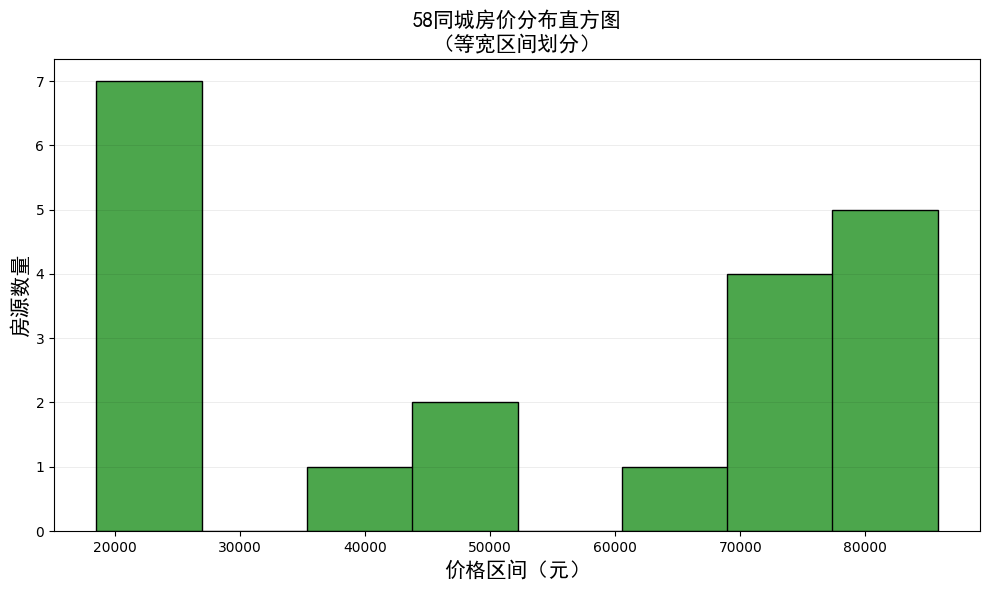

In [57]:

df = pd.read_excel('./data/58.xlsx')
df = pd.DataFrame(df)
df_bin1 = pd.cut(df['price'],bins = 8).value_counts()
mid_points = [(interval.left + interval.right)/2 for interval in df_bin1.index]
df_bin1.index = mid_points
df_bin1 = df_bin1.sort_index()
plt.figure(figsize=(10,6))
plt.bar(df_bin1.index.astype(int),df_bin1.values,facecolor='#4ca64c',edgecolor='black',width=8466.066)
plt.xticks(list(range(20000,90000,10000)))
for i in range(1,8):
    plt.axhline(y=i, color='black',linewidth = 0.5,alpha = 0.1)
plt.xlabel('价格区间（元）',fontname='SimHei',size=15)
plt.ylabel('房源数量',fontname='SimHei',size=15)
plt.title('58同城房价分布直方图\n（等宽区间划分）',fontname='SimHei',size=15)
plt.tight_layout()
plt.show()

### 题目8： 户型与价格关系 - 柱状图
比较不同户型（公寓、连排别墅、独立屋）的平均价格,绘制各户型的平均价格柱状图

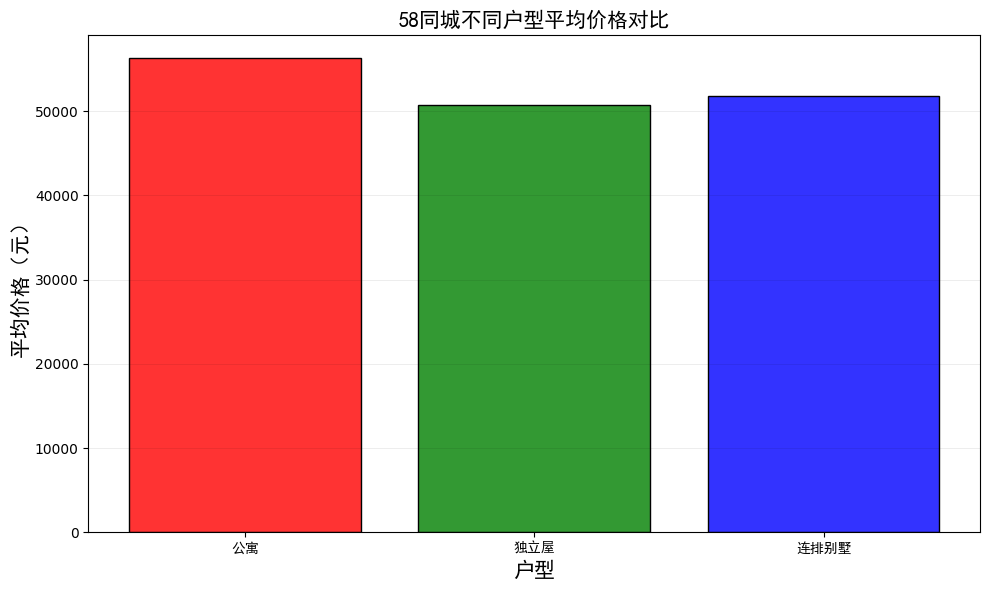

In [68]:

df = pd.read_excel('./data/58.xlsx')
df = pd.DataFrame(df)
df_bin = df.groupby('housetype')['price'].mean()
plt.figure(figsize=(10,6))
plt.bar(df_bin.index.astype(str),df_bin.values,facecolor=['#ff3333','#339933','#3333ff'],edgecolor='black')
plt.xticks(list(df_bin.index),fontname='SimHei')
for i in range(10000,60000,10000):
    plt.axhline(y=i, color='black',linewidth = 0.5,alpha = 0.1)
plt.xlabel('户型',fontname='SimHei',size=15)
plt.ylabel('平均价格（元）',fontname='SimHei',size=15)
plt.title('58同城不同户型平均价格对比',fontname='SimHei',size=15)
plt.tight_layout()
plt.show()


### 题目9： 房屋面积与价格关系 - 散点图
探索房屋面积与价格的相关关系，绘制面积-价格的散点图

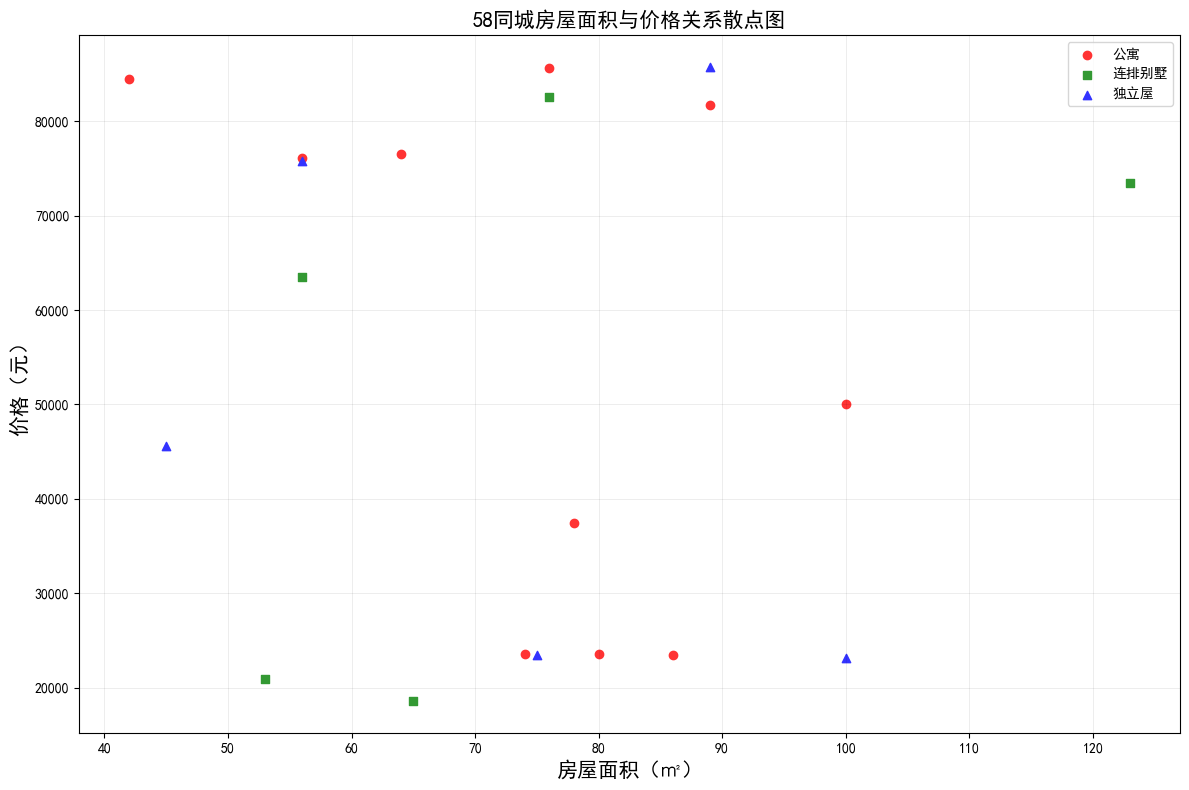

In [108]:

from matplotlib.font_manager import FontProperties


df = pd.read_excel('./data/58.xlsx')
df = pd.DataFrame(df)
plt.figure(figsize=(12,8))
plt.scatter(df[df['housetype']=='公寓']['housearea'],df[df['housetype']=='公寓']['price'],marker='o',color='#ff3333',label='公寓')
plt.scatter(df[df['housetype']=='连排别墅']['housearea'],df[df['housetype']=='连排别墅']['price'],marker='s',color='#339933',label='连排别墅')
plt.scatter(df[df['housetype']=='独立屋']['housearea'],df[df['housetype']=='独立屋']['price'],marker='^',color='#3333ff',label='独立屋')
plt.legend(loc='upper right',prop=FontProperties(family='SimHei'))
for i in range(20000,90000,10000):
    plt.axhline(y=i, color='black',linewidth = 0.5,alpha = 0.1)
for i in range(40,130,10):
    plt.axvline(x=i, color='black',linewidth = 0.5,alpha = 0.1)
plt.xlabel('房屋面积（㎡）',fontname='SimHei',size=15)
plt.ylabel('价格（元）',fontname='SimHei',size=15)
plt.title('58同城房屋面积与价格关系散点图',fontname='SimHei',size=15)
plt.tight_layout()
plt.show()

### 题目10： 楼层分布分析 - 曲线图
分析楼层高度与房价的关系趋势，绘制楼层与平均价格的折线图

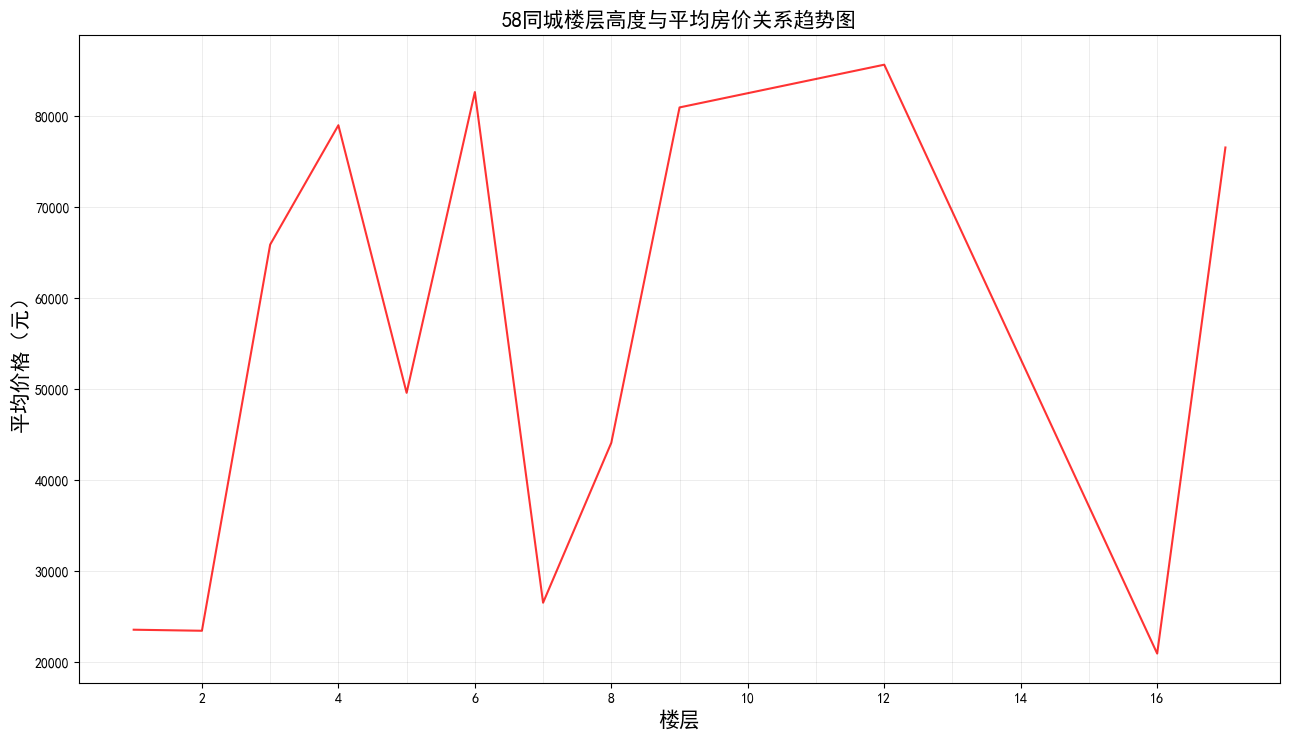

In [112]:
df = pd.read_excel('./data/58.xlsx')
df = pd.DataFrame(df)
plt.figure(figsize=(13,7.5))
df_bin = df.groupby('housefloor')['price'].mean()
plt.plot(df_bin.index.astype(int),df_bin.values,color='#ff3333')
for i in range(20000,90000,10000):
    plt.axhline(y=i, color='black',linewidth = 0.5,alpha = 0.1)
for i in range(2,17,1):
    plt.axvline(x=i, color='black',linewidth = 0.5,alpha = 0.1)
plt.xlabel('楼层',fontname='SimHei',size=15)
plt.ylabel('平均价格（元）',fontname='SimHei',size=15)
plt.title('58同城楼层高度与平均房价关系趋势图',fontname='SimHei',size=15)
plt.tight_layout()
plt.show()